# Developing a model for predicting F1 score

**We are building model for `RUMINATING LYING` activities which can predict f1 score**

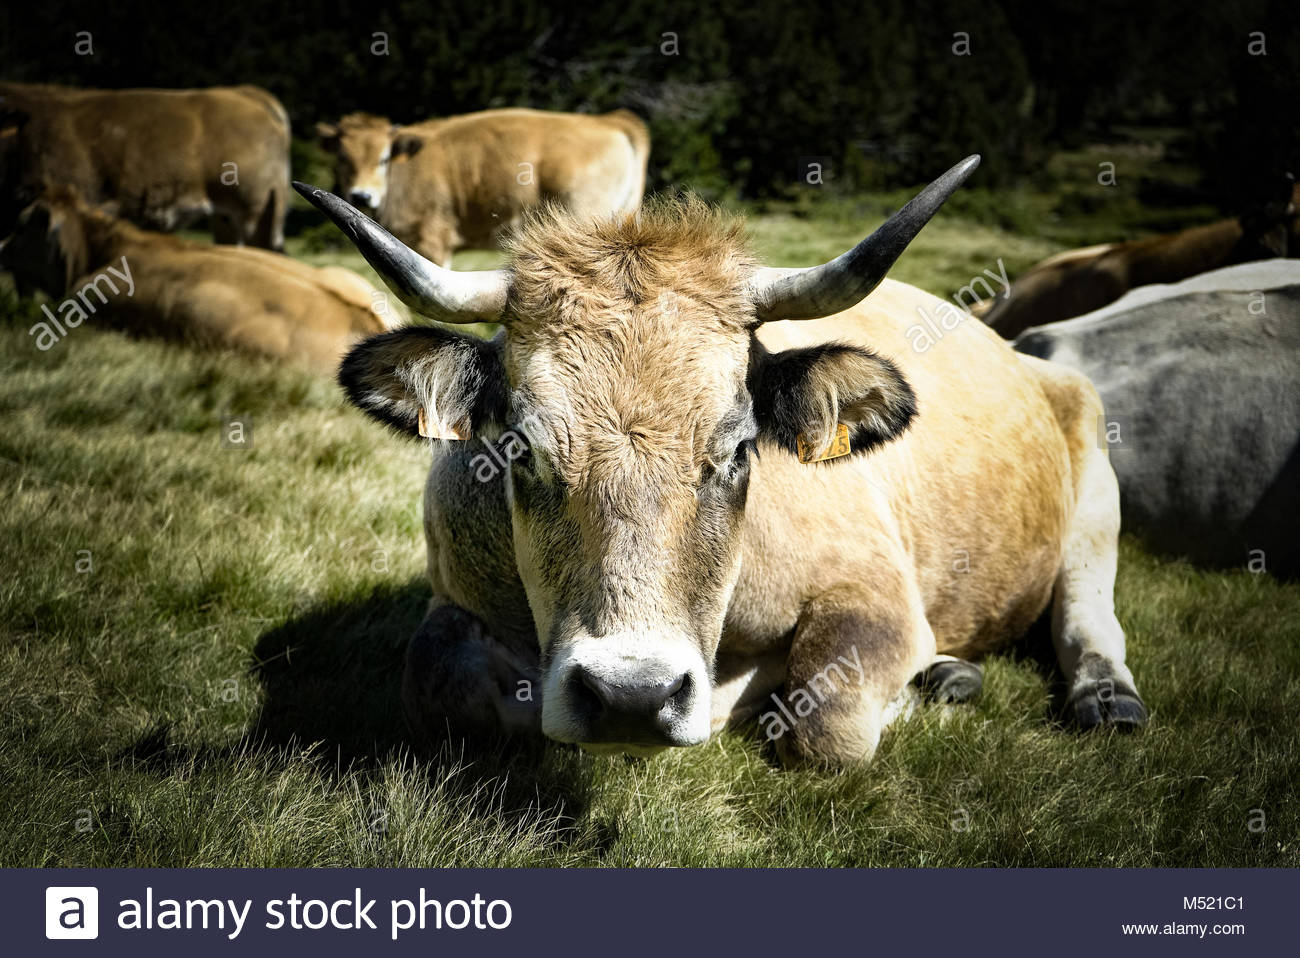

In [47]:
Image("brown-cow-ruminating-lying-down-facing-camera-in-mountain-pasture-M521C1.png",
width=700,
    height=200)

In [5]:
#Importing tools we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [18]:
df=pd.read_csv("RL7_train.csv")

In [19]:
df

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628327640,-0.292480,0.950684,-0.017578,-3.112793,-0.732422,-2.441406,-198.0,1359.0,579.0,7
1,1628327640,-0.288086,0.929199,-0.014160,-2.807617,-0.061035,-1.953125,-207.0,1341.0,568.5,7
2,1628327640,-0.294434,0.923340,-0.006348,-2.197266,1.708984,-0.610352,-211.5,1344.0,571.5,7
3,1628327640,-0.306641,0.922852,-0.010742,-0.549316,0.610352,-0.854492,-201.0,1351.5,564.0,7
4,1628327640,-0.315918,0.925293,0.003906,1.220703,15.380859,-0.305176,-198.0,1369.5,580.5,7
...,...,...,...,...,...,...,...,...,...,...,...
1928963,1628329770,0.212891,0.998535,0.074219,0.488281,-2.075195,0.610352,-634.5,1039.5,676.5,7
1928964,1628329771,0.216309,1.003418,0.078613,0.122070,-5.432129,0.183106,-615.0,1041.0,678.0,7
1928965,1628329771,0.196777,0.972656,0.073730,-0.427246,-5.981445,0.610352,-636.0,1041.0,682.5,7
1928966,1628329771,0.216797,0.968750,0.082519,-1.708984,-7.873535,-1.892090,-630.0,1033.5,681.0,7


In [8]:
df.dtypes

time     float64
acc_x     object
acc_y    float64
acc_z     object
gyr_x    float64
gyr_y    float64
gyr_z     object
mag_x    float64
mag_y    float64
mag_z    float64
label    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778869 entries, 0 to 3778868
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    float64
 1   acc_x   object 
 2   acc_y   float64
 3   acc_z   object 
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   object 
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   float64
dtypes: float64(8), object(3)
memory usage: 317.1+ MB


In [10]:
df.describe()

,time,acc_y,gyr_x,gyr_y,mag_x,mag_y,mag_z,label
count,3.778869e+06,3.778869e+06,3.778868e+06,3.778868e+06,3.778864e+06,3.778863e+06,3.778861e+06,3778859.0
mean,1.628173e+09,6.733653e-01,9.545901e-01,-1.859367e+00,-3.930588e+02,5.312057e+02,2.970021e+02,7.0
std,1.189643e+06,3.631060e+00,8.717020e+00,9.854002e+00,3.600262e+02,5.452596e+02,4.994339e+02,0.0
min,9.863280e-02,-5.910000e+02,-1.999756e+03,-1.998779e+03,-1.533000e+03,-6.540000e+02,-1.152000e+03,7.0
25%,1.628091e+09,8.813477e-01,-1.281738e+00,-3.967285e+00,-6.720000e+02,9.450000e+01,4.050000e+01,7.0
50%,1.628120e+09,9.409180e-01,1.037598e+00,-1.953125e+00,-4.875000e+02,7.245000e+02,5.685000e+02,7.0
75%,1.628319e+09,9.697266e-01,3.295898e+00,1.831055e-01,-2.175000e+02,1.012500e+03,6.360000e+02,7.0
max,1.628415e+09,6.914000e+03,1.332000e+03,1.999756e+03,7.665000e+02,1.387500e+03,1.147500e+03,7.0


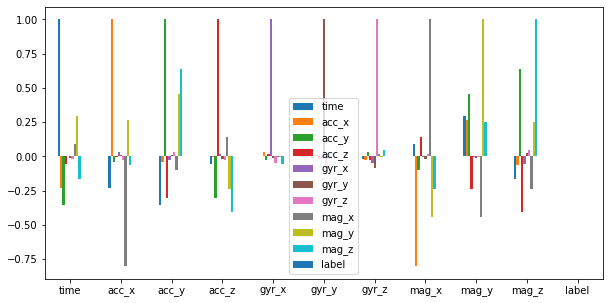

In [20]:
df.corr().plot(kind="bar",
              figsize=(10,5))
plt.xticks(rotation=0);


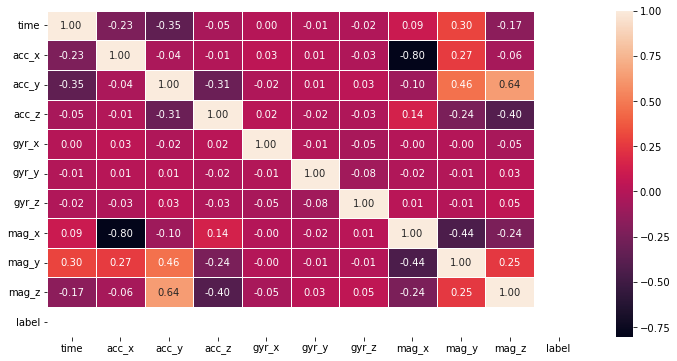

In [21]:
corr_mat=df.corr()
fig,ax = plt.subplots(figsize=(12,6))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              fmt=".2f")

In [22]:
#IMport train, test and split from sklearn model selection module
from sklearn.model_selection import train_test_split

#Creating x & y label
X=df.drop("label",axis=1)
y=df["label"]


#Spliting the data into training and testing
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2)

In [23]:
X_train

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
1643013,1628130250,0.304688,0.946289,-0.040527,-0.061035,-0.976563,-0.183106,-448.5,1051.5,618.0
1408433,1628102220,0.237793,1.008301,0.096680,5.676270,-2.624512,6.347656,-723.0,1003.5,627.0
1711127,1628309943,0.208496,0.978516,-0.006836,3.234863,-8.056641,0.793457,-564.0,1024.5,679.5
1369866,1628091541,0.436524,0.887695,-0.085449,3.479004,-2.746582,0.488281,-784.5,957.0,702.0
503777,1628339323,0.017578,-1.049805,0.135254,-1.098633,-10.925293,-7.019043,-183.0,87.0,-822.0
...,...,...,...,...,...,...,...,...,...,...
1360072,1628091340,0.415039,0.926270,-0.063477,-2.319336,-4.455566,-1.281738,-766.5,945.0,724.5
974238,1628077184,0.245117,0.948731,0.139648,-18.798828,10.986328,-4.333496,-441.0,151.5,552.0
1287587,1628089851,0.312500,0.937500,-0.032227,2.685547,-3.051758,-0.671387,-763.5,949.5,682.5
1032320,1628096953,0.171875,0.977051,0.070801,1.831055,-0.427246,0.305176,-570.0,114.0,100.5


In [24]:
y_train

1643013    7
1408433    7
1711127    7
1369866    7
503777     7
          ..
1360072    7
974238     7
1287587    7
1032320    7
800071     7
Name: label, Length: 1543174, dtype: int64

In [25]:
X_test

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
1815324,1628320459,0.131836,0.978516,0.019043,2.075195,-5.065918,3.112793,-648.0,997.5,721.5
1236441,1628131416,0.718750,-0.669434,0.013184,-1.831055,-9.338379,19.531250,-769.5,-420.0,154.5
1100425,1628104273,0.216309,0.963867,0.087891,0.000000,-0.915527,-0.671387,-624.0,96.0,534.0
1519053,1628118190,0.283203,0.869629,0.434570,6.286621,-0.854492,0.549316,-756.0,1030.5,511.5
1271373,1628089501,0.315918,0.939941,-0.063965,5.371094,2.685547,-1.098633,-763.5,961.5,672.0
...,...,...,...,...,...,...,...,...,...,...
750448,1628090633,-0.402344,0.876465,0.138184,4.760742,-1.159668,-0.854492,373.5,-268.5,571.5
1713084,1628309987,0.213867,0.979004,-0.013672,-2.014160,-4.455566,-0.976563,-589.5,1035.0,681.0
129646,1628413373,-0.112305,0.980957,0.094238,0.854492,-1.770020,-0.061035,-234.0,1339.5,571.5
843994,1628068065,0.178711,0.995606,0.090820,3.417969,2.868652,-2.502441,-484.5,141.0,594.0


In [26]:
y_test

1815324    7
1236441    7
1100425    7
1519053    7
1271373    7
          ..
750448     7
1713084    7
129646     7
843994     7
609272     7
Name: label, Length: 385794, dtype: int64

In [27]:
#Importing RandomForestRegressor from sklearn's model selection module
from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor()

In [28]:
#Fitting model into training and testing dataset
clf.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
clf.fit(X_test,y_test)

RandomForestRegressor()

In [30]:
clf.score(X_test,y_test)

1.0

In [31]:
clf.score(X_train,y_train)

1.0

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_pred

array([7., 7., 7., ..., 7., 7., 7.])

In [34]:
#Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           7       1.00      1.00      1.00    385794

    accuracy                           1.00    385794
   macro avg       1.00      1.00      1.00    385794
weighted avg       1.00      1.00      1.00    385794



In [36]:
#F1 score
from sklearn.metrics import f1_score

f1_score(y_test,y_pred,average="weighted")

1.0